# Battleships

so I lifted some code frome [here](https://codereview.stackexchange.com/questions/276997/python-battleship-game-code-to-place-random-ships-on-the-board)

It's OK but it's not **modern** or even **moderately good**


In [ ]:
import random


# this is dumb u should use integers :(
EMPTY = '.'
FULL = 'x'

# as I explained you change direction by taking the transpose
DIRECTIONS = (
    (0, 1),  # Right
    (0, -1), # Left
    (1, 0),  # Up
    (-1, 0), # Down
)
MIN_SIZE = 3
MAX_SIZE = 5

def print_board():
    board, ships = generate_board(10, 4)
    for row in board:
        print(' '.join(row))

def generate_board(board_size, n_ships):
    # A board without ship information is ambiguous so return both.
    board = [[EMPTY] * board_size for _ in range(board_size)]
    ships = []
    while len(ships) < n_ships:
        row = random.randint(0, board_size - 1)
        col = random.randint(0, board_size - 1)
        direction = random.choice(DIRECTIONS)
        ship_size = random.randint(MIN_SIZE, MAX_SIZE)
        ship = generate_ship(board, row, col, ship_size, direction)
        if ship:
            ships.append(ship)
            for r, c in ship:
                board[r][c] = FULL
    return (board, ships)


#basically redundant if you know how to use numpy
def generate_ship(board, row, col, ship_size, direction):
    r = row
    c = col
    dr, dc = direction
    cells = []
    for _ in range(ship_size):
        if is_empty(board, r, c):
            cells.append((r, c))
            r += dr
            c += dc
        else:
            return None
    return cells

#totally redundant with numpy/matplotlib
def is_empty(board, row, col):
    try:
        return min(row, col) >= 0 and board[row][col] == EMPTY
    except IndexError:
        pass
    return False

print_board()

In [39]:
M = generate_board(20, 4)

TypeError: cannot unpack non-iterable int object

In [131]:
list(zip(*np.where(M == 5)))

[(3, 2), (4, 2), (5, 2), (6, 2), (7, 2)]

In [40]:
import random
import numpy as np
import matplotlib.pyplot as plt

def generate_board(board_size=10, 
                   ship_sizes=(2,5),
                   num_ships=7)->np.ndarray:
    
    MIN_SIZE, MAX_SIZE = ship_sizes
    
    board = np.zeros((board_size+2, board_size+2), dtype=int)

    for k in range(num_ships):
        ship_size = random.randint(MIN_SIZE, MAX_SIZE)
        
        if random.random() > .5:
            board = board.T
        
        #this is dumb and I'll fix it later
        for _ in range(200):
            row = random.randint(1, board_size - ship_size - 1)
            col = random.randint(1, board_size )
            if np.all(board[row:row + ship_size, col]== 0):
                break #found a slot
        else:
            MAX_SIZE -=1
            continue
            
        board[row-1:row+ship_size+1, col-1:col+2] = 1
        board[row:row+ship_size, col] = k + 2
        
    return board

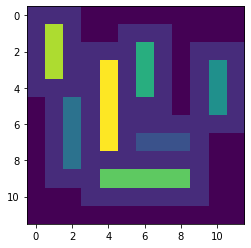

In [42]:
B = generate_board()
plt.imshow(B);

In [58]:
B[(1,1)]

7

miss [ 2 10]
miss [3 2]
miss [5 8]
miss [1 2]
miss [10  9]
miss [4 1]
hit (5, 10)
from todo [ 5 11]
finished
finished ship
miss [ 5 11]
from todo [4 9]
miss [4 9]
from todo [3 8]
finished
finished ship
miss [3 8]
from todo [ 6 10]
miss [ 6 10]
from todo [ 7 10]
finished
finished ship
miss [ 7 10]
from todo [ 4 10]
hit (4, 10)
from todo [ 3 10]
hit (3, 10)
from todo [ 2 10]
finished
finished ship
miss [ 2 10]
miss [9 1]
hit (9, 5)
from todo [9 6]
hit (9, 6)
from todo [9 7]
hit (9, 7)
from todo [9 8]
hit (9, 8)


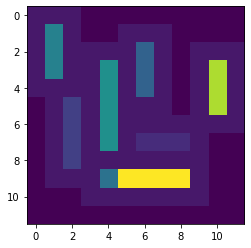

In [312]:
sz = B.shape[0]
G = np.zeros_like(B)
to_do = []

def guess(sz):
    def search():
        while True:
            gg = np.random.randint(1,high=sz-1,size=2)
            if G[tuple(gg)] == 0 : break
        return gg
    
    if not to_do or not to_do[-1]:
        gg = search()
    else:
        gg = to_do[-1].pop(0)
        print('from todo',gg)
        #this is a queue it should do this itself
        if not to_do[-1]: 
            print("finished")
        if not to_do[-1]: 
            to_do.pop()
            print("finished ship")
 
    pt = tuple(gg)

    score = B[pt]
    if score > 1:
        print('hit',pt)
        G[pt] = 10
        if not to_do:
            L = [gg + [-k,0] for k in range(1,5) if gg[0] - k > 0]
            R = [gg + [k,0]  for k in range(1,5) if gg[0] + k < sz]
            U = [gg + [0-k] for k in range(1,5) if gg[1] - k > 0]
            D = [gg + [0,k]  for k in range(1,5) if gg[1] + k < sz]
            #print(L,'*',R)
            for _ in L,R,U,D:
                to_do.append(_)

        
    else:
        print('miss',gg)
        G[pt] = -1
        #abandon this 
        if to_do and to_do[-1]:
            to_do[-1].pop()
        if to_do and not to_do[-1]: 
            to_do.pop()
            print("finished scan")
 
    
for _ in range(20):
    guess(sz)

G[G<0] = 0
plt.imshow(G + B);


In [286]:
to_do

[[array([8, 7]), array([9, 7]), array([10,  7]), array([11,  7])]]

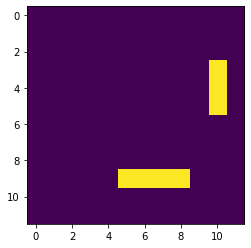

In [313]:
plt.imshow(G)

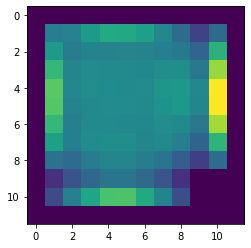

In [4]:
X = np.zeros_like(generate_board())
for k in range(10000):
    bb = generate_board()
    #if not bb: continue
    bb[bb<3] = 0
    bb[bb>0] = 1
    X = X + bb

#X[X< 20] = 0
plt.imshow(X);

In [275]:
X = [[1]*3,[2]*10]

In [283]:
X[-1].pop()
X

[[1, 1, 1], [2, 2]]